In [25]:
from collections import defaultdict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Popular ML Algorithms

## Linear Regression with Gradient Descent

## Logistic Regression with Gradient Descent

## K-Means Clustering

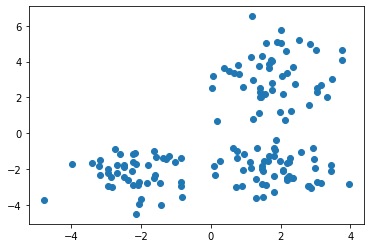

In [132]:
# get data
a = np.random.multivariate_normal([-2, -2], [[1.0, 0], [0, 1.0]], 50).T
b = np.random.multivariate_normal([2, -2], [[0.5, 0], [0, 0.5]], 50).T
c = np.random.multivariate_normal([2, 3], [[1.0, 0], [0, 1.5]], 50).T
X = np.hstack([a, b, c])
plt.scatter(X[0], X[1]);

Steps
1. Randomly choose k centroids
2. Calculate distance between centroids for all points. Assign points to closest centroid
3. Find new centroid and repeat

* Given a N sized list of numbers and a k
    * Return list L of size N with each value being 1 to k
    * Means number in list at index i is assigned to cluster value at index i in L

In [187]:
class KMeans:
    def __init__(self, k, **kwargs):
        self.k = k
        self.iter = 100 if 'iter' not in kwargs else kwargs['iter']
        self.tol = 1e-6 if 'tol' not in kwargs else kwargs['tol']
        
    def fit(self, data):
        self.data = data
        self.num_els = data.shape[1]
        self.clusters, self.data_clusters = self._build_clusters()
        
    def _build_clusters(self):
        prev_c = None
        new_c = [[self.data[0][i], self.data[1][i]] for i in np.random.randint(low=0, high=self.num_els, size=self.k)]
        cntr = 1
        while self._centroid_max_dist(prev_c, new_c) > self.tol and cntr < self.iter:
            c_distances = self._calculate_distances(new_c)
            cluster_assign = self._assign_to_clusters(c_distances)
            prev_c = new_c
            new_c = self._compute_centroids(cluster_assign, prev_c)
            cntr += 1 
        
        return new_c, cluster_assign
    
    @staticmethod
    def _centroid_max_dist(prev, new):
        if prev is None:
            return float("infinity")
        
        return max([KMeans._l2_dist(p, n) for p,n in zip(prev, new)])
    
    @staticmethod
    def _l2_dist(p1, p2):
        p1, p2 = np.array(p1), np.array(p2)
        return np.linalg.norm(p1-p2)
    
    def _compute_centroids(self, c_assign, prev_c):
        centroids = [None]*self.k
        for cluster in c_assign:
            if len(c_assign[cluster][0]) == 0 and len(c_assign[cluster][1]) == 0:
                centroids[cluster-1] = prev_c[cluster-1]
                continue
                
            # Can choose mid-point alternatively to the mean
            # x_mid = (max(c_assign[cluster][0]) + min(c_assign[cluster][0]))/2
            # y_mid = (max(c_assign[cluster][1]) + min(c_assign[cluster][1]))/2
            x_mean, y_mean = np.mean(c_assign[cluster], axis=1)
            centroids[cluster-1] = [x_mean, y_mean]
            
        return centroids
    
    def _assign_to_clusters(self, distances):
        cluster_assign = {c+1:[[], []] for c in range(self.k)}
        for i, d in enumerate(distances):
            cluster = np.argmin(d)+1
            coords = cluster_assign.get(cluster)
            coords[0].append(self.data[0][i])
            coords[1].append(self.data[1][i])
        
        return cluster_assign
    
    def _calculate_distances(self, clusters):
        distances = []
        for point in zip(self.data[0], self.data[1]):
            distances.append([self._l2_dist(point, c) for c in clusters])
        
        return distances
    
    def inertia(self):
        sqrd_dists = []
        for cluster, data in self.data_clusters.items():
            c_coords = self.clusters[cluster-1]
            c_sqrd_dists = [np.power(self._l2_dist(point, c_coords), 2) for point in zip(data[0], data[1])]
            sqrd_dists.extend(c_sqrd_dists)
        
        return np.mean(sqrd_dists)
    
    def silhoutte_score(self):
        pass
        # for cluster, data in self.data_clusters.items():
            # mean distance to all points within same cluster
            
    

    
    def assign(self, point):
        pass
        

In [188]:
models = []
for i in range(10):
    kmeans = KMeans(3)
    kmeans.fit(X)
    models.append(kmeans)

best_model = sorted(models, key=lambda m:m.inertia())[0]

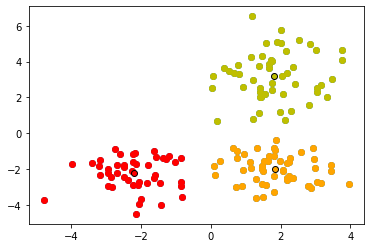

In [189]:
fig, ax = plt.subplots()

ax.scatter(X[0], X[1])
clrs = ['r', 'orange', 'y', 'g']

for cluster, data in best_model.data_clusters.items():
    ax.scatter(data[0], data[1], color=clrs[cluster-1])

for i, c in enumerate(best_model.clusters):
    ax.scatter(c[0], c[1], color=clrs[i], edgecolor = 'k');